In [52]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.calibration import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , accuracy_score
import numpy as np
from matplotlib import pyplot as plt

In [53]:
labeled_df = pd.read_csv('../data/labeled.csv')
labeled_df.head()

,id,text,cleaned_text_with_stop_words_removal,label
0,1807053896587919743,We should consider dismantling provincial stru...,consid dismantl provinci structur empow local ...,neutral
1,1807031275989114981,Those joining in insurance online will be requ...,join insur onlin requir provid nation ident ca...,positive
2,1807030978554269711,Minister Aryal also requested the provincial a...,minist aryal also request provinci local gover...,positive
3,1807029744837300466,\xf0\x9f\x8c\xbe Happy National Paddy Day (Aas...,xf0x9fx8cxbe happi nation paddi day aasar 15 x...,positive
4,1806998724926755034,Climate action plans and targets set by the Ne...,climat action plan target set nepal govern gui...,positive


In [54]:
labeled_df.isnull().sum()
null_rows = labeled_df[labeled_df['cleaned_text_with_stop_words_removal'].isnull()]
print("Rows with null values in 'cleaned_text_with_stop_words_removal':")
print(null_rows)
labeled_df.dropna(subset=['cleaned_text_with_stop_words_removal'], inplace=True)
duplicates_text = labeled_df.duplicated(subset=['cleaned_text_with_stop_words_removal'])
labeled_df[duplicates_text]

Rows with null values in 'cleaned_text_with_stop_words_removal':
                       id                                               text  \
7913  1149606322318401536  @SudeepS1402 @rsansar @katesictibet @LokAawaaz...   

     cleaned_text_with_stop_words_removal    label  
7913                                  NaN  neutral  


,id,text,cleaned_text_with_stop_words_removal,label


In [55]:
# def plot_confusion_matrix(cm, model_name, labels):
#         disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
#         disp.plot(cmap=plt.cm.Blues, values_format='d')
#         plt.title(f'Confusion Matrix for {model_name} (Train-Test Split: 80-20)')
#         plt.show()

        
# def trainSvc(X_train, X_test, y_train, y_test):
#     # Train SVM model
#     # svm_model = SVC(C=10, class_weight='balanced')
#     svm_model = SVC()
#     svm_model.fit(X_train, y_train)

#     # Evaluate SVM model
#     svm_predictions = svm_model.predict(X_test)
#     print("SVM Model Performance:")
#     print(classification_report(y_test, svm_predictions))
#     svm_conf_matrix = confusion_matrix(y_test, svm_predictions, labels=np.unique(y_test))
#     plot_confusion_matrix(svm_conf_matrix, f'SVM', np.unique(y_test))
#     # print(svm_conf_matrix)

# def trainNaive(X_train, X_test, y_train, y_test):
#     # Train Naive Bayes model
#     nb_model = MultinomialNB()
#     nb_model.fit(X_train, y_train)

#     # Evaluate Naive Bayes model
#     nb_predictions = nb_model.predict(X_test)
#     print("Naive Bayes Model Performance:")
#     print(classification_report(y_test, nb_predictions))
#     # svm_conf_matrix = confusion_matrix(y_test, nb_predictions, labels=['Positive', 'Negative', 'Neutral'])
    

In [56]:
# Initialize TF-IDF Vectorizer


def Vectorize(text):

    tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,1))

    # Fit and transform the labeled data
    return tfidf.fit_transform(text)
     

In [70]:
# y=["positive","neutral","negative"]
# label_encoder = LabelEncoder()
# y_labeled = label_encoder.fit_transform(y)
# print(y_labeled)

[2 1 0]


In [57]:
# countpositive = 0
# countnegative=0
# countneutral=0
# for data in labeled_df['label']:
#     # print(data)
#     if data == 2:
#         countpositive = countpositive +1
#     elif data == 0:
#         countnegative = countnegative +1
#     else:
#         countneutral = countneutral +1


# print(countpositive,countnegative,countneutral)

SVM Model Performance:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       653
           1       0.76      0.37      0.50       324
           2       0.68      0.83      0.75       711

    accuracy                           0.71      1688
   macro avg       0.73      0.65      0.67      1688
weighted avg       0.72      0.71      0.70      1688



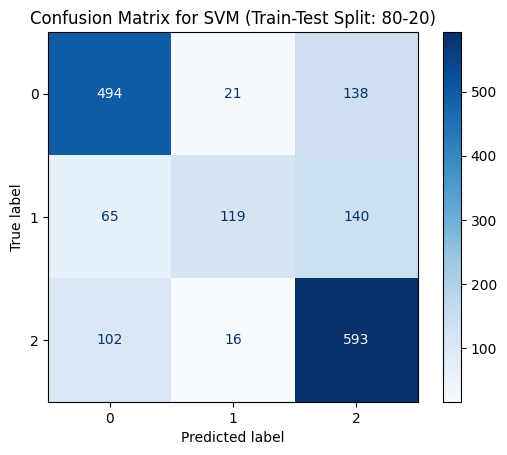

Naive Bayes Model Performance:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       653
           1       0.87      0.10      0.19       324
           2       0.62      0.85      0.72       711

    accuracy                           0.66      1688
   macro avg       0.73      0.56      0.54      1688
weighted avg       0.70      0.66      0.61      1688



In [80]:
X_labeled = Vectorize(labeled_df['cleaned_text_with_stop_words_removal'])
label_encoder = LabelEncoder()
y_labeled = label_encoder.fit_transform(labeled_df['label'])


# # Split the labeled data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, stratify= y_labeled,random_state=42)
# print("X_train:", X_train)
# print("X_test:", X_test)
# print("y_train:", y_train)
# print("y_test:", y_test)


# trainSvc(X_train, X_test, y_train, y_test)
# trainNaive(X_train, X_test, y_train, y_test)


In [108]:
def train_predict_plot(X_train, X_test, y_train, y_test, split):
    # Train Naive Bayes model
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    nb_predictions = nb_model.predict(X_test)
    nb_conf_matrix = confusion_matrix(y_test, nb_predictions, labels=np.unique(y_test))
    nb_accuracy = accuracy_score(y_test, nb_predictions)
    
    # Train SVM model
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)
    svm_predictions = svm_model.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    svm_conf_matrix = confusion_matrix(y_test, svm_predictions, labels=np.unique(y_test))
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    

    # Plot confusion matrices
    def plot_confusion_matrix(cm, model_name, accuracy,labels):
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
        disp.plot(cmap=plt.cm.Blues, values_format='d')
        plt.title(f'Confusion Matrix for {model_name} (Train-Test Split: {split*100}-{(100-split*100)})')
        plt.suptitle(f'Accuracy: {accuracy:.2f}', fontsize=12, y=0.97) 
        # plt.text(0.5, -0.1, f'Accuracy: {accuracy:.2f}', ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
        plt.savefig(f'../reports/confusion_matrix_{model_name}_{split*100}_{100-split*100}.png', bbox_inches='tight')
        plt.show()

    plot_confusion_matrix(svm_conf_matrix, f'SVM',svm_accuracy, np.unique(y_test))
    plot_confusion_matrix(nb_conf_matrix, f'Naive Bayes',nb_accuracy, np.unique(y_test))
    


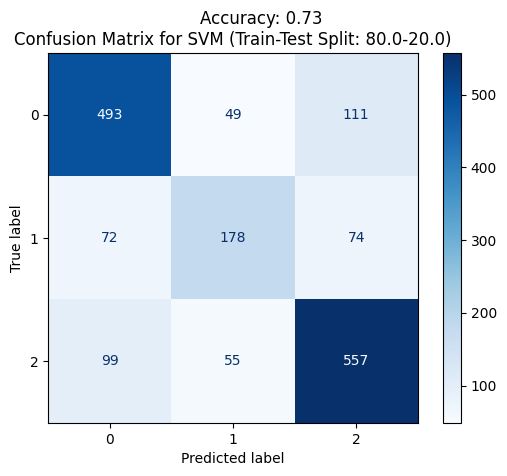

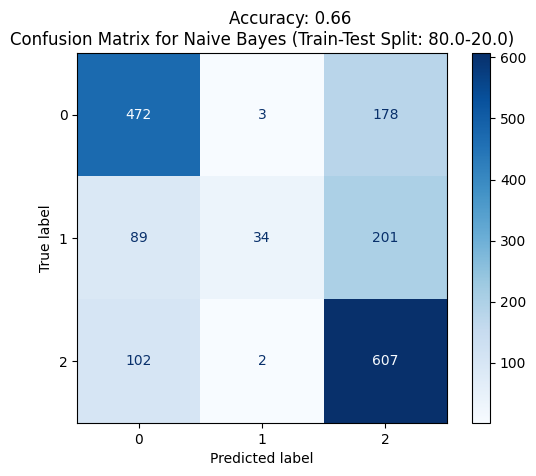

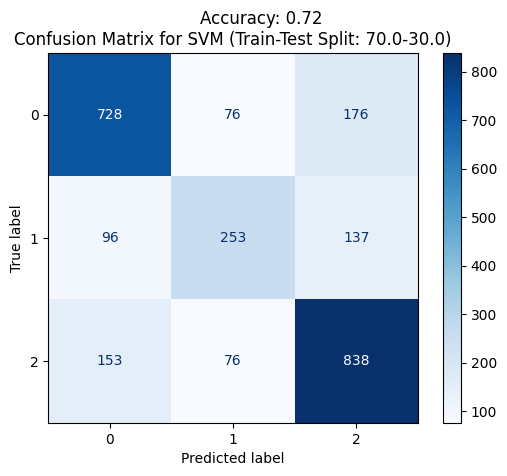

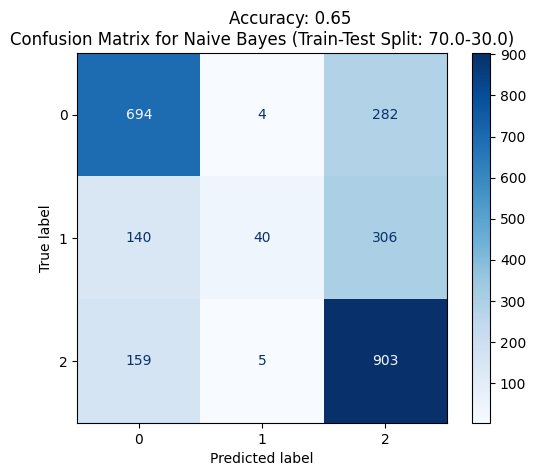

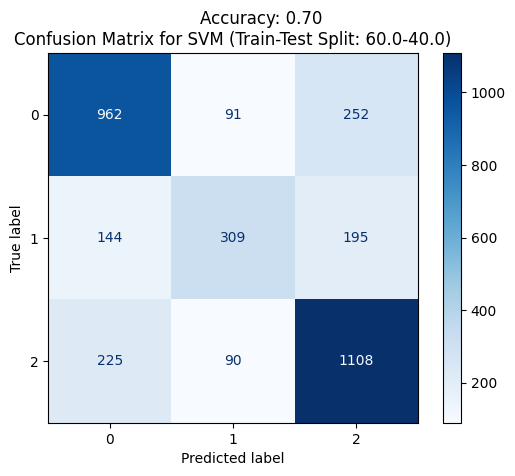

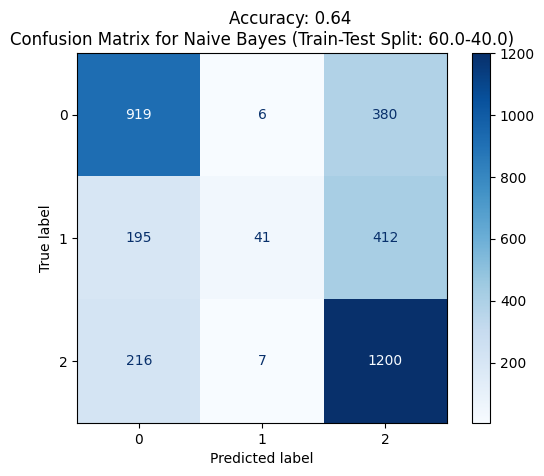

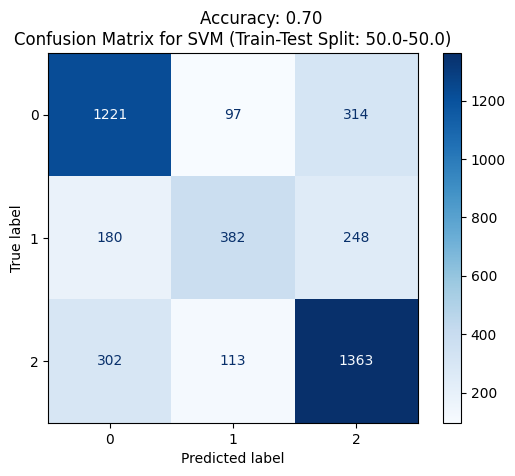

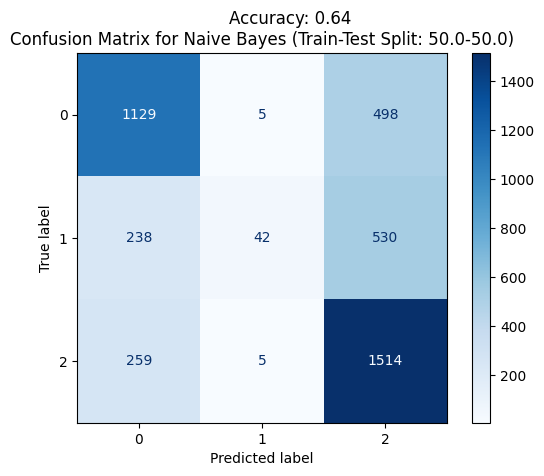

In [109]:
splits = [0.8, 0.7, 0.6, 0.5]
for split in splits:
    X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=(1-split),stratify= y_labeled, random_state=42)
    train_predict_plot(X_train, X_test, y_train, y_test, split)